# ライブラリ

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# データセット

In [2]:
df = pd.DataFrame([[1,2,3,4],[5,6,np.nan,8],[10,11,12,np.nan]])
df

,0,1,2,3
0,1,2,3.0,4.0
1,5,6,NaN,8.0
2,10,11,12.0,NaN


In [3]:
df2 = pd.DataFrame([['green','M',10.1,'class1'],['red','L',13.5,'class2'],['blue','XL',15.3,'class1']])
df2.columns = ['colors','size','price','class']
df2

,colors,size,price,class
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


In [4]:
df_wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data', header=None)
df_wine.columns = ['Class label', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids',
                   'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df_wine.head()

,Class label,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


# データ補間

In [5]:
from sklearn.impute import SimpleImputer as SimpImp

imr = SimpImp(missing_values=np.nan, strategy='mean')
imr = imr.fit(df.values)
imputed_data = imr.transform(df.values)
imputed_data

array([[ 1. ,  2. ,  3. ,  4. ],
       [ 5. ,  6. ,  7.5,  8. ],
       [10. , 11. , 12. ,  6. ]])

# カテゴリデータ変換

## 順序ベース

In [6]:
size_map = {'XL':3,'L':2,'M':1}
df2['size'] = df2['size'].map(size_map)

In [7]:
df2['size']

0    1
1    2
2    3
Name: size, dtype: int64

In [8]:
# 逆変換
inv_size_map = {v: k for k, v in size_map.items()}
df2['size'] = df2['size'].map(inv_size_map)

In [9]:
df2

,colors,size,price,class
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XL,15.3,class1


## LabelEncode

In [10]:
from sklearn.preprocessing import LabelEncoder

class_le = LabelEncoder()
y = class_le.fit_transform(df2['class'].values)
y

array([0, 1, 0])

In [11]:
class_le.inverse_transform(y)

array(['class1', 'class2', 'class1'], dtype=object)

## one-hot

In [12]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

X = df2[['colors', 'size', 'price']].values
ohe = ColumnTransformer([('encoder', OneHotEncoder(), [0])], remainder='passthrough')
ohe.fit_transform(X)

array([[0.0, 1.0, 0.0, 'M', 10.1],
       [0.0, 0.0, 1.0, 'L', 13.5],
       [1.0, 0.0, 0.0, 'XL', 15.3]], dtype=object)

In [13]:
pd.get_dummies(df2[['colors', 'size', 'price']])

,price,colors_blue,colors_green,colors_red,size_L,size_M,size_XL
0,10.1,0,1,0,0,1,0
1,13.5,0,0,1,1,0,0
2,15.3,1,0,0,0,0,1


# データ分割

In [14]:
from sklearn.model_selection import train_test_split

X, y = df_wine.iloc[:, 1:].values, df_wine.iloc[:, 0].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 正規化

In [15]:
from sklearn.preprocessing import MinMaxScaler

mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.fit_transform(X_test)

# 標準化

In [16]:
from sklearn.preprocessing import StandardScaler

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(X_train)
X_test_std = stdsc.fit_transform(X_test)

# L1正則化ロジスティクス回帰

In [17]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(penalty='l1', C=0.1)
lr.fit(X_train_std, y_train)
print('Trainig Accuracy: ', lr.score(X_train_std, y_train))
print('Test Accuracy: ', lr.score(X_test_std, y_test))

Trainig Accuracy:  0.9596774193548387
Test Accuracy:  1.0


In [18]:
lr.intercept_

array([-0.37281679, -0.12065055, -0.75570826])

In [19]:
lr.coef_

array([[ 0.35625998,  0.        ,  0.        , -0.14996905,  0.        ,
         0.        ,  0.64721199,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  1.16154244],
       [-0.73651224,  0.        , -0.00172432,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        , -1.03530442,
         0.        ,  0.        , -0.28859593],
       [ 0.        ,  0.03625157,  0.        ,  0.        ,  0.        ,
         0.        , -0.62441791,  0.        ,  0.        ,  0.52454089,
        -0.33669078, -0.57188521,  0.        ]])

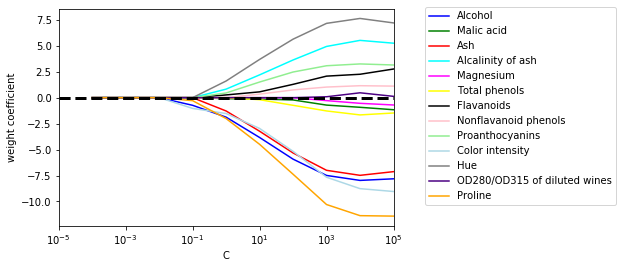

In [20]:
fig = plt.figure()
ax = plt.subplot(111)
    
colors = ['blue', 'green', 'red', 'cyan', 'magenta', 'yellow', 'black', 
          'pink', 'lightgreen', 'lightblue', 'gray', 'indigo', 'orange']

weights, params = [], []
for c in np.arange(-4.0, 6.0):
    lr = LogisticRegression(penalty='l1', C=10.**c, random_state=0)
    lr.fit(X_train_std, y_train)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights = np.array(weights)

for column, color in zip(range(weights.shape[1]), colors):
    plt.plot(params, weights[:, column],
             label=df_wine.columns[column + 1], color=color)

plt.axhline(0, color='black', linestyle='--', linewidth=3)
plt.xlim([10**(-5), 10**5])
plt.ylabel('weight coefficient')
plt.xlabel('C')
plt.xscale('log')
plt.legend(loc='upper left')
ax.legend(loc='upper center', bbox_to_anchor=(1.38, 1.03), ncol=1, fancybox=True)
plt.show()

# SBS による特徴量選択

In [22]:
from sklearn.neighbors import KNeighborsClassifier
import sbs

knn = KNeighborsClassifier(n_neighbors=2)
selector = sbs.SBS(knn, k_features=1)
selector.fit(X_train_std, y_train)

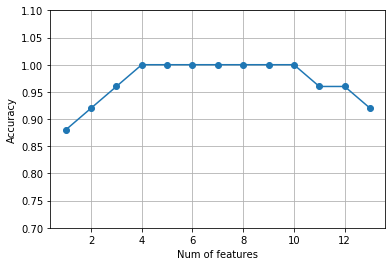

In [23]:
# 近傍点の個数のリスト
k_features_list = [len(k) for k in selector.subsets_]

plt.plot(k_features_list, selector.scores_, marker='o')
plt.ylim([0.7, 1.1])
plt.ylabel('Accuracy')
plt.xlabel('Num of features')
plt.grid()
plt.show()

In [24]:
k5 = list(selector.subsets_[8])
print(df_wine.columns[1:][k5])

Index(['Alcohol', 'Magnesium', 'Flavanoids', 'Hue', 'Proline'], dtype='object')


In [28]:
# 全特徴量を用いた分類
knn.fit(X_train_std, y_train)
print('Training Accuracy: ', knn.score(X_train_std, y_train))
print('Test Accuracy: ', knn.score(X_test_std, y_test))

Training Accuracy:  0.967741935483871
Test Accuracy:  0.9444444444444444


In [29]:
# 特徴量削減後の分類
knn.fit(X_train_std[:, k5], y_train)
print('Training Accuracy: ', knn.score(X_train_std[:, k5], y_train))
print('Test Accuracy: ', knn.score(X_test_std[:, k5], y_test))

Training Accuracy:  0.9919354838709677
Test Accuracy:  0.9814814814814815


# RandomForest による特徴量選択

1) Color intensity                0.179231
 2) Flavanoids                     0.147062
 3) Proline                        0.135616
 4) Alcohol                        0.123624
 5) OD280/OD315 of diluted wines   0.120925
 6) Hue                            0.078744
 7) Total phenols                  0.064997
 8) Alcalinity of ash              0.036782
 9) Proanthocyanins                0.031902
10) Magnesium                      0.031710
11) Malic acid                     0.027828
12) Ash                            0.012996
13) Nonflavanoid phenols           0.008584


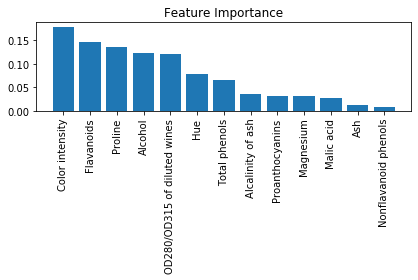

In [34]:
from sklearn.ensemble import RandomForestClassifier

feature_labels = df_wine.columns[1:]
forest = RandomForestClassifier(n_estimators=1000, random_state=42)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]

for feat in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (feat + 1, 30, feature_labels[indices[feat]], importances[indices[feat]]))

plt.title('Feature Importance')
plt.bar(range(X_train.shape[1]), importances[indices], align='center')
plt.xticks(range(X_train.shape[1]), feature_labels[indices], rotation=90)
plt.xlim([-1, X_train.shape[1]])
plt.tight_layout()
plt.show()

In [44]:
# 特徴量選択
selected_f = indices[:3]
X_train[:, selected_f].shape

(124, 3)

In [45]:
from sklearn.feature_selection import SelectFromModel

sfm = SelectFromModel(forest, prefit=True, threshold=0.12)
X_selected = sfm.transform(X_train)
X_selected.shape

(124, 5)